# Github : https://github.com/KarisG

In [1]:
import os

In [2]:
os.getcwd()

'/home/kgwet'

In [3]:
os.chdir('/datadrive/kgwet')

In [4]:
!ls

'Covid Negative'   data_correct.npy	   model
'Covid Positive'   dataa.npy		   model-001.model
 PetImages	   df_a_preprocessed.csv   model_cnn_no_tl.h5
 data.npy	   df_b_preprocessed.csv   model_weights.h5


# Import libraries

In [5]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import shutil

# Import data

In [6]:
cat_path = r"/datadrive/kgwet/PetImages/Cat/"
dog_path = r"/datadrive/kgwet/PetImages/Dog/"

cat_files = glob(cat_path + '/*')
dog_files = glob(dog_path + '/*')

cat_files = cat_files[:2000]
dog_files = dog_files[:2000]
# Because 25 000 images are too big for my computer


cat = []
dog = []
classes = ["Cat","Dog"]
labels = []

#Some images are unreadable so we have to check it before labeling
for file in cat_files:
    if cv2.imread(file) is not None:
        cat.append(file)
        labels.append(0)
        

for file in dog_files:
    if cv2.imread(file) is not None:
        dog.append(file)
        labels.append(1)

In [65]:
classes = ["Cat","Dog"]

In [7]:
print("size of valid cat images :",len(cat))
print("size of valid dog images :",len(dog))
print("total",len(dog)+len(cat))

size of valid cat images : 1995
size of valid dog images : 1990
total 3985


# Labeling

# Regroup data into one list

In [8]:
data = []

In [9]:
for file in cat:
    data.append(file)

for file in dog:
    data.append(file)

In [10]:
len(data)

3985

# Visualize data before preprocessing

In [100]:
np.array(cv2.cvtColor(cv2.imread(data[0]), cv2.COLOR_BGR2RGB))

array([[[ 2,  2,  2],
        [11, 13, 12],
        [ 9, 13, 12],
        ...,
        [ 5, 14,  9],
        [ 9, 14, 10],
        [ 2,  3,  0]],

       [[10, 10, 10],
        [24, 26, 25],
        [29, 35, 33],
        ...,
        [27, 36, 31],
        [24, 29, 25],
        [ 9, 10,  5]],

       [[10, 12, 11],
        [30, 34, 33],
        [44, 53, 50],
        ...,
        [45, 56, 50],
        [32, 38, 34],
        [10, 12,  9]],

       ...,

       [[12,  9,  4],
        [29, 21, 18],
        [46, 35, 31],
        ...,
        [30, 28, 29],
        [22, 20, 21],
        [12, 10, 13]],

       [[ 6,  5,  3],
        [18, 14, 11],
        [30, 22, 20],
        ...,
        [20, 18, 19],
        [17, 15, 16],
        [11,  9, 12]],

       [[ 2,  2,  2],
        [ 6,  6,  6],
        [12,  8,  9],
        ...,
        [ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8]]], dtype=uint8)

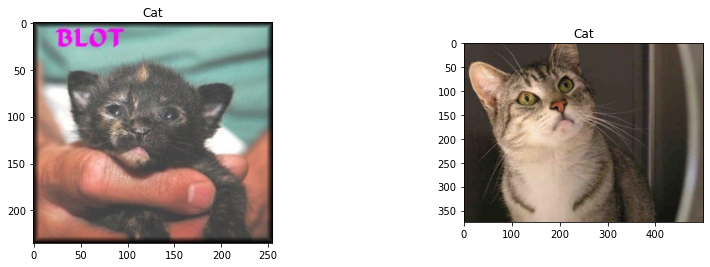

In [98]:
row = 1
col = 2
_, ax = plt.subplots(row, col, figsize=(12,12))
for i, ax in enumerate(ax.flatten()):
    img = cv2.imread(data[i])
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(image)
    ax.imshow(img)
    ax.set_title(categories[labels[i]])
    plt.subplots_adjust(wspace=0.8)

(375, 500, 3)
(240, 320, 3)


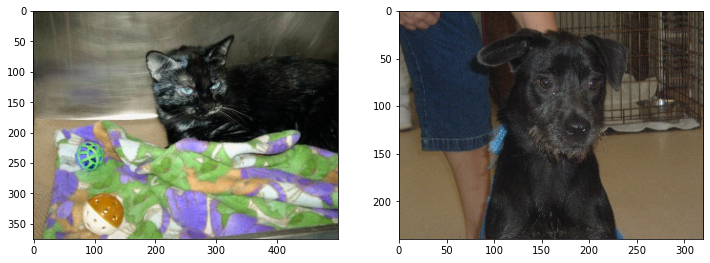

In [74]:
fig = plt.figure(figsize=(12,12))

subplot1 = fig.add_subplot(1,2,1)
subplot1.imshow(cv2.imread(data[1889]))
image = cv2.cvtColor(cv2.imread(data[1889]), cv2.COLOR_BGR2RGB)
img = np.array(image)
subplot2.imshow(img)
print(cv2.imread(data[1889]).shape)


subplot2 = fig.add_subplot(122)
image = cv2.cvtColor(cv2.imread(data[2889]), cv2.COLOR_BGR2RGB)
img2 = np.array(image)
subplot2.imshow(img2)
print(cv2.imread(data[2889]).shape)

plt.show()

* Images are not in a grayscale and there are too many differents dimensions. So we have to make pre-processing before building our model.

# Preprocessing

* Change the dimension
* Apply grayscale in each image
* Normalization
* Change the scale

In [13]:
from PIL import Image

In [14]:
def preprocessing(images_array):
    data_pp = []
    IMAGE_SIZE = 256
    for img in images_array:
        img = cv2.imread(img)
        rescaled_image = (np.maximum(img,0) / img.max()) * 255.0 #rescale between 0 and 255 in case there is negative pixels
        new_img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
        new_img = new_img / 255.0 #rescale between 0 and 1
        data_pp.append(new_img)
    return data_pp

In [15]:
data_pp = []
data_pp = preprocessing(data)

In [16]:
data_pp[0].shape

(256, 256, 3)

## Visualization after preprocessing

(256, 256, 3)
(256, 256, 3)


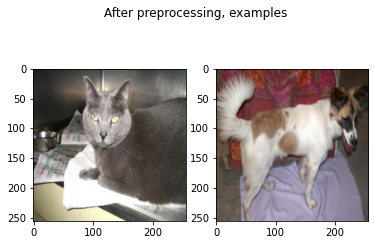

In [112]:
fig = plt.figure()

print(data_pp[1555].shape)
subplot1 = fig.add_subplot(1,2,1)
image = cv2.cvtColor(data_pp[1555].astype('float32'), cv2.COLOR_BGR2RGB)
subplot1.imshow(image)

print(data_pp[2555].shape)
subplot2=fig.add_subplot(1,2,2)
image2 = cv2.cvtColor(data_pp[2555].astype('float32'), cv2.COLOR_BGR2RGB)
subplot2.imshow(image2);

plt.suptitle("After preprocessing, examples");

## Normalization

In [18]:
data_pp[0]

array([[[0.00784314, 0.00784314, 0.00784314],
        [0.04705882, 0.05098039, 0.04313725],
        [0.04705882, 0.05098039, 0.03529412],
        ...,
        [0.03529412, 0.05490196, 0.01960784],
        [0.03921569, 0.05490196, 0.03529412],
        [0.        , 0.01176471, 0.00784314]],

       [[0.03529412, 0.03529412, 0.03529412],
        [0.09019608, 0.09411765, 0.08627451],
        [0.11764706, 0.1254902 , 0.10196078],
        ...,
        [0.10980392, 0.12941176, 0.09411765],
        [0.09019608, 0.10588235, 0.08627451],
        [0.01568627, 0.03529412, 0.03137255]],

       [[0.04313725, 0.04705882, 0.03921569],
        [0.12156863, 0.1254902 , 0.11372549],
        [0.18039216, 0.19215686, 0.16078431],
        ...,
        [0.18039216, 0.20392157, 0.16078431],
        [0.1254902 , 0.14117647, 0.11764706],
        [0.03137255, 0.04705882, 0.03921569]],

       ...,

       [[0.01568627, 0.03137255, 0.04313725],
        [0.0627451 , 0.0745098 , 0.10196078],
        [0.11372549, 0

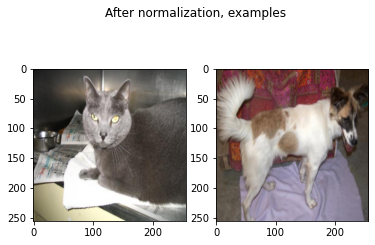

In [111]:
fig = plt.figure()

subplot1 = fig.add_subplot(1,2,1)
image = cv2.cvtColor(data_pp[1555].astype('float32'), cv2.COLOR_BGR2RGB)
subplot1.imshow(image)

subplot2=fig.add_subplot(1,2,2)
image2 = cv2.cvtColor(data_pp[2555].astype('float32'), cv2.COLOR_BGR2RGB)
subplot2.imshow(image2);

plt.suptitle("After normalization, examples");

## Change the scale/shape

In [20]:
data_pp = np.array(data_pp)

In [21]:
data_pp.shape

(3985, 256, 256, 3)

# Model

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input

In [24]:
vgg = VGG16(input_shape=(256,256,3), weights='imagenet', include_top=False) #include_top means whether I include the last layer, here I don't

In [25]:
for layer in vgg.layers:
        layer.trainable = False # it makes we don't train the layers

In [26]:
x = tf.keras.layers.Flatten()(vgg.output) #Flatten the vgg.output

In [27]:
pred = tf.keras.layers.Dense(2, activation='sigmoid')(x)

In [28]:
model = tf.keras.models.Model(vgg.input, outputs=pred)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [30]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data augmentation

In [31]:
data_gen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.5, 1.5])

# Separation into train, validation and test set

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np

In [33]:
labels = np.array(labels)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data_pp, labels, test_size=0.2, random_state=2022)

XX_train, X_valid, yy_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train, random_state=2022)

In [35]:
print(XX_train.shape)
print(yy_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2550, 256, 256, 3)
(2550,)
(638, 256, 256, 3)
(638,)


In [36]:
yy_train = yy_train.reshape(yy_train.shape[0],1)
y_valid = y_valid.reshape(y_valid.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [37]:
print(XX_train.shape)
print(yy_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2550, 256, 256, 3)
(2550, 1)
(638, 256, 256, 3)
(638, 1)


In [38]:
yy_train = keras.utils.to_categorical(yy_train, 2)
y_valid = keras.utils.to_categorical(y_valid, 2)
y_test = keras.utils.to_categorical(y_test, 2)

print(yy_train.shape)
print(y_valid.shape)
print(y_test.shape)

(2550, 2)
(638, 2)
(797, 2)


In [39]:
history = model.fit(data_gen.flow(XX_train, yy_train, batch_size=8), validation_data=(X_valid, y_valid), epochs=10) 

Epoch 1/10
319/319 [==============================] - 398s 1s/step - loss: 0.6075 - accuracy: 0.7078 - val_loss: 0.8600 - val_accuracy: 0.7241
Epoch 2/10
319/319 [==============================] - 394s 1s/step - loss: 0.4776 - accuracy: 0.8000 - val_loss: 0.3245 - val_accuracy: 0.8762
Epoch 3/10
319/319 [==============================] - 395s 1s/step - loss: 0.4502 - accuracy: 0.8220 - val_loss: 0.2880 - val_accuracy: 0.8856
Epoch 4/10
319/319 [==============================] - 400s 1s/step - loss: 0.4469 - accuracy: 0.8267 - val_loss: 0.2821 - val_accuracy: 0.8966
Epoch 5/10
319/319 [==============================] - 424s 1s/step - loss: 0.4433 - accuracy: 0.8294 - val_loss: 0.3534 - val_accuracy: 0.8730
Epoch 6/10
319/319 [==============================] - 426s 1s/step - loss: 0.4194 - accuracy: 0.8302 - val_loss: 0.2758 - val_accuracy: 0.9075
Epoch 7/10
319/319 [==============================] - 427s 1s/step - loss: 0.4386 - accuracy: 0.8282 - val_loss: 0.3419 - val_accuracy: 0.8887

In [40]:
model.save_weights('model_weights_tl.h5')
model.save('model_cnn_with_tl.h5')

# Test

In [41]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 96s 4s/step - loss: 0.3555 - accuracy: 0.8858


[0.3555270731449127, 0.8858218193054199]

* We have ~89% accuracy and ~0.35 loss

In [58]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [76]:
X_test[0]

array([[[0.0627451 , 0.09019608, 0.14901961],
        [0.07058824, 0.09803922, 0.15686275],
        [0.0745098 , 0.09411765, 0.15686275],
        ...,
        [0.03529412, 0.04313725, 0.43529412],
        [0.04705882, 0.05098039, 0.44705882],
        [0.04705882, 0.05098039, 0.44705882]],

       [[0.07058824, 0.10196078, 0.16862745],
        [0.06666667, 0.09411765, 0.16470588],
        [0.05882353, 0.09019608, 0.15686275],
        ...,
        [0.03921569, 0.05098039, 0.44705882],
        [0.05882353, 0.0627451 , 0.4627451 ],
        [0.05882353, 0.0627451 , 0.4627451 ]],

       [[0.08235294, 0.1254902 , 0.20392157],
        [0.06666667, 0.10980392, 0.18823529],
        [0.05882353, 0.09411765, 0.17254902],
        ...,
        [0.04705882, 0.05098039, 0.45882353],
        [0.05098039, 0.05098039, 0.4627451 ],
        [0.05098039, 0.05490196, 0.46666667]],

       ...,

       [[0.2627451 , 0.23137255, 0.18039216],
        [0.26666667, 0.23529412, 0.18431373],
        [0.27058824, 0

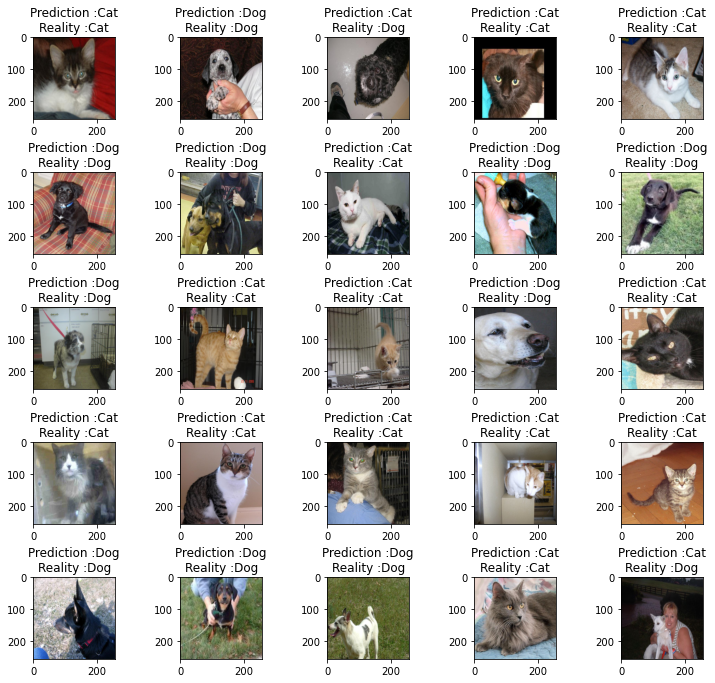

In [105]:
_, ax = plt.subplots(5,5,figsize=(12,12))
for i, ax in enumerate(ax.flatten()):
    image = cv2.cvtColor(X_test[i].astype('float32'), cv2.COLOR_BGR2RGB)
    img = np.array(image)
    ax.imshow(img)
    ax.set_title("Prediction :"+str(categories[y_pred[i]])+"\n"+"Reality :"+str(categories[y_true[i]]))
    plt.subplots_adjust(wspace=0.8)

* Some errors but this is not surprising. We have 10% of errors

# Metrics

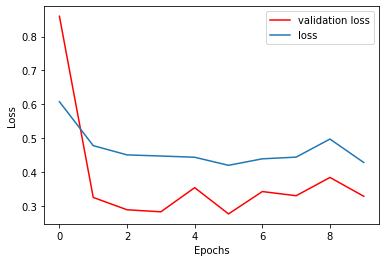

In [61]:
plt.plot(history.history["val_loss"],'r', label="validation loss")
plt.plot(history.history["loss"], label="loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

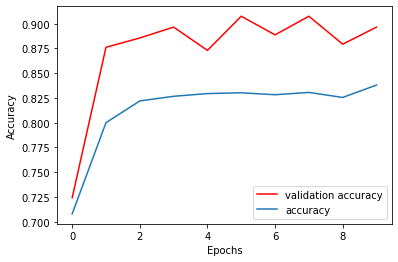

In [62]:
plt.plot(history.history["val_accuracy"],'r', label="validation accuracy")
plt.plot(history.history["accuracy"], label="accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [66]:
print(classification_report(y_pred, y_true, target_names=classes))

              precision    recall  f1-score   support

         Cat       0.82      0.95      0.88       346
         Dog       0.96      0.84      0.89       451

    accuracy                           0.89       797
   macro avg       0.89      0.89      0.89       797
weighted avg       0.90      0.89      0.89       797



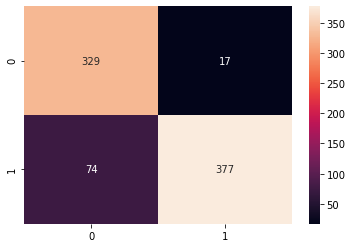

In [67]:
sns.heatmap(confusion_matrix(y_pred,y_true), annot=True, fmt='d');

* Transfer learning offers way better results than "only" with convolutional neural network 